In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
adata = sc.read('D:/UCI Research/CellxGene Tutorial/data/brain_clusters.h5ad')
raw = pd.DataFrame(data=adata.raw.X, index=adata.raw.obs_names, columns=adata.raw.var_names)

In [4]:
astrocyte_marker = 'Gja1' # define genes of interest
# housekeeping = 'Chmp2a' 

cluster2 = raw[adata.obs['louvain'] == '2'] # Use a mask to subset dataset to cells assigned to cluster 2
not_cluster2 = raw[adata.obs['louvain'] != '2'] # All other cells

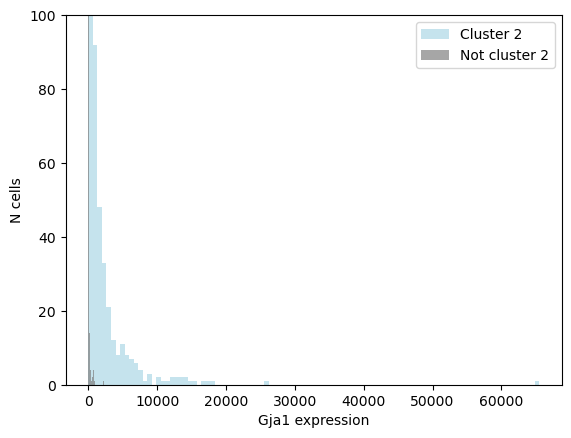

In [5]:
cluster2_marker_exp = cluster2[astrocyte_marker] 
plt.hist(cluster2_marker_exp.values, bins=100, color='lightblue', alpha=0.7, label='Cluster 2') # Plot distribution

not_cluster2_marker_exp = not_cluster2[astrocyte_marker]
plt.hist(not_cluster2_marker_exp, bins=100, color='gray', alpha=0.7, label='Not cluster 2')

plt.ylim(0,100) # Cut off at N=100 for visual clarity
plt.xlabel('%s expression'%astrocyte_marker) # label our axes
plt.ylabel('N cells')
plt.legend()

In [6]:
from scipy.stats import ttest_ind

ttest = ttest_ind(cluster2_marker_exp, 
          not_cluster2_marker_exp, 
          equal_var=False, # it's not necessarily fair to assume that these two populations have equal variance
          nan_policy='omit') # omit NaN values
print(ttest)

TtestResult(statistic=10.472000263778707, pvalue=2.320405372459763e-23, df=506.2992628381441)


In [ ]:
# 1 - This result tells you that we would be very surprised 
# if these two populations had no true difference in mean expression, given the observed sample.

# 2 - A t-test compares our data to the null hypothesis that the means of two distributions are **equal**. 
# This accounts for the mean, standard deviation, and sample size of the two distributions. 
# However, a p-value alone does not tell us anything about the *magnitude* of that difference: 
# with large N, even very small (and biologically meaningless) differences in expression values 
# can still return very "statistically significant" p-values. 

In [ ]:
#1 - To remind yourself of the available metadata, run print(adata)
# 2 - To subset the raw values based on metadata, use the following pattern:

# variable = raw[ adata.obs[field] == value ]
# 3 - To check if a gene is in this dataset, use print('Gene1' in raw.columns.values) 
# (pay attention to the gene name casing! :)

In [7]:
print(adata)

AnnData object with n_obs × n_vars = 3210 × 18585
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode', 'n_genes', 'n_counts', 'kmeans', 'louvain'
    var: 'ERCC', 'n_cells', 'n_counts', 'mean', 'std'
    uns: 'cell_ontology_class_colors', 'kmeans_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'plate.barcode_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


# Working with whole dataset


C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value

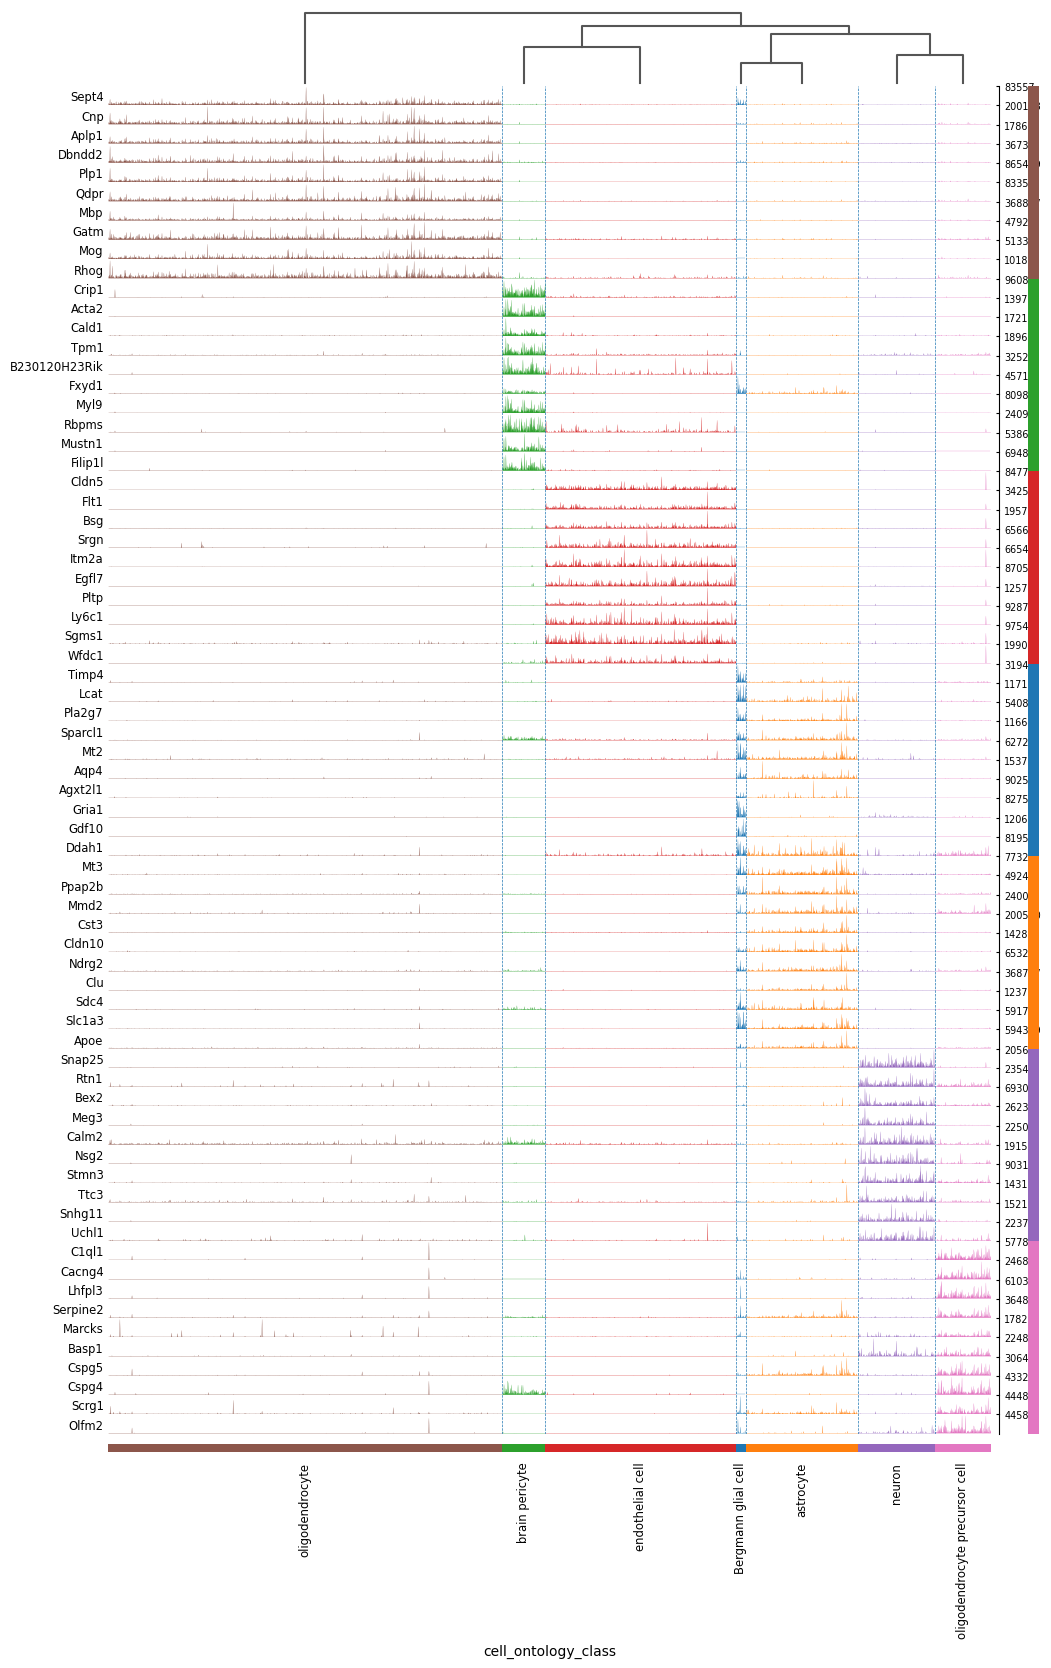

In [10]:
sc.tl.rank_genes_groups(adata, groupby='cell_ontology_class', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell_ontology_class') # plot the result

C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Anaconda\envs\master\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value

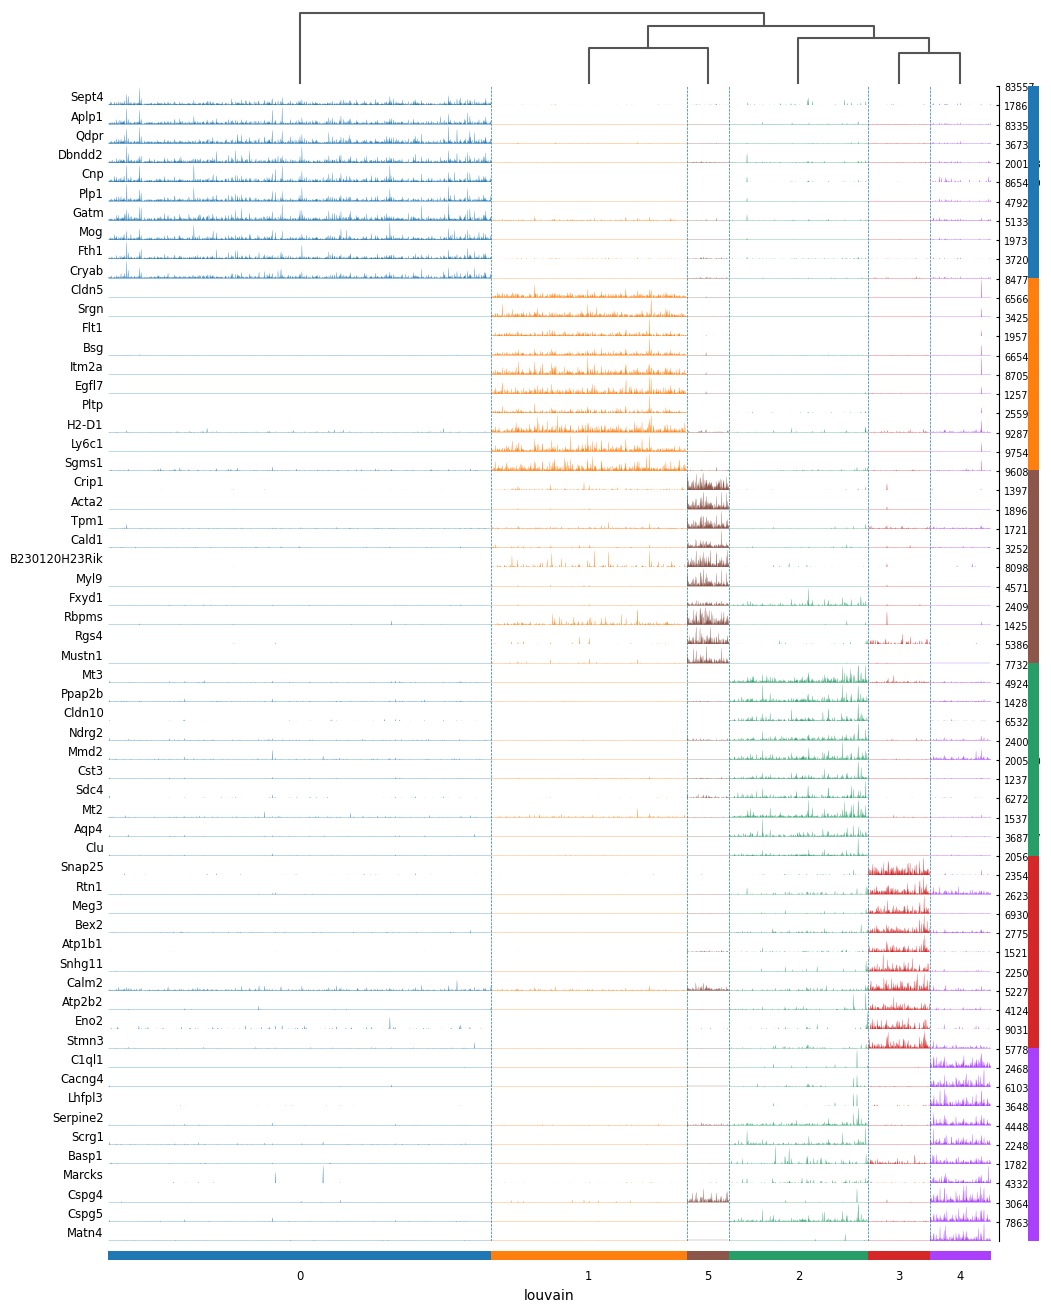

In [11]:
sc.tl.rank_genes_groups(adata, groupby='louvain', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='louvain') # plot the result

# Comparing to "known" marker genes 

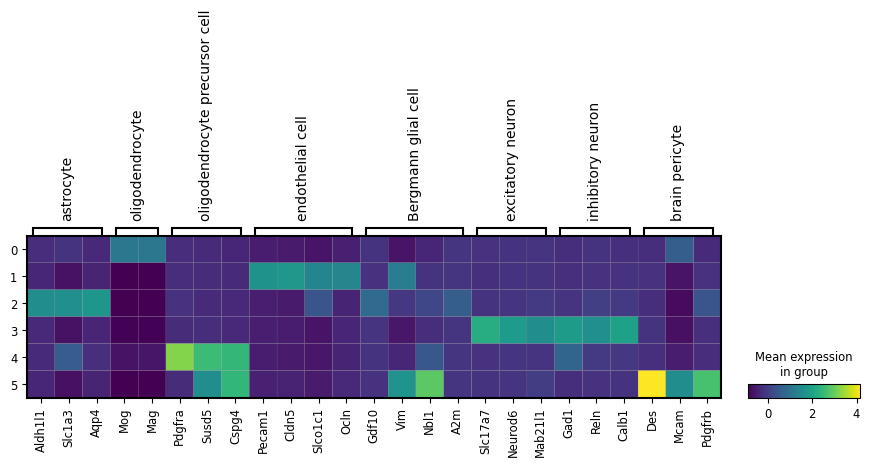

In [12]:
marker_genes = {
'astrocyte': ['Aldh1l1', 'Slc1a3', 'Aqp4'], 
'oligodendrocyte': ['Mog','Mag'],
'oligodendrocyte precursor cell': ['Pdgfra','Susd5','Cspg4'],
'endothelial cell': ['Pecam1','Cldn5','Slco1c1','Ocln'],
'Bergmann glial cell': ['Gdf10','Vim','Nbl1','A2m'],
'excitatory neuron': ['Slc17a7','Neurod6','Mab21l1'],
'inhibitory neuron': ['Gad1','Reln','Calb1'],
'brain pericyte': ['Des','Mcam','Pdgfrb']
}

sc.pl.matrixplot(adata, marker_genes, groupby='louvain', use_raw=False)